   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

100%|██████████| 6.25M/6.25M [00:00<00:00, 19.8MB/s]


100%|██████████| 134k/134k [00:00<00:00, 1.39MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 271.7ms
Speed: 18.6ms preprocess, 271.7ms inference, 32.0ms postprocess per image at shape (1, 3, 640, 480)


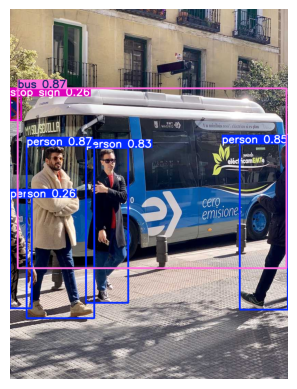

Class: bus, Confidence: 0.87, Bounding Box: [22.87126922607422, 231.2772674560547, 805.002685546875, 756.8403930664062]
Class: person, Confidence: 0.87, Bounding Box: [48.55046844482422, 398.5522155761719, 245.34556579589844, 902.7026977539062]
Class: person, Confidence: 0.85, Bounding Box: [669.472900390625, 392.1860656738281, 809.7201538085938, 877.0354614257812]
Class: person, Confidence: 0.83, Bounding Box: [221.517333984375, 405.79864501953125, 344.9706726074219, 857.53662109375]
Class: person, Confidence: 0.26, Bounding Box: [0.0, 550.5250244140625, 63.00694274902344, 873.4429321289062]
Class: stop sign, Confidence: 0.26, Bounding Box: [0.05817067623138428, 254.45938110351562, 32.55740737915039, 324.8741760253906]


In [2]:
!pip install ultralytics opencv-python matplotlib

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = YOLO('yolov8n.pt')

image_path = 'https://ultralytics.com/images/bus.jpg'
results = model(image_path)

image = results[0].plot()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        xyxy = box.xyxy[0].tolist()
        print(f"Class: {model.names[class_id]}, Confidence: {confidence:.2f}, Bounding Box: {xyxy}")


In [3]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')

video_path = "/content/yolov8_inputvid.mp4"
output_path = "/content/yolov8_outputvid.mp4"

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    frame = results[0].plot()

    out.write(frame)

cap.release()
out.release()

print(f"✅ Video processing complete! Output saved at: {output_path}")



0: 384x640 1 person, 103.8ms
Speed: 3.9ms preprocess, 103.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 97.4ms
Speed: 3.5ms preprocess, 97.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 101.3ms
Speed: 4.2ms preprocess, 101.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 95.2ms
Speed: 3.1ms preprocess, 95.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 105.6ms
Speed: 2.8ms preprocess, 105.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 90.3ms
Speed: 2.7ms preprocess, 90.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 97.6ms
Speed: 2.8ms preprocess, 97.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 99.0ms
Speed: 3.1ms preprocess, 99.0ms inference, 0.8ms postprocess per image at shape (1,

In [5]:
from google.colab import files
files.download("/content/yolov8_outputvid.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>